In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [ ]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# checking for missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [ ]:
#Logistic regression assumes features are on comparable scales.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

Y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test_scaled)[:,1])

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print(classification_report(Y_test, Y_pred))


Accuracy: 0.9824561403508771
ROC-AUC: 0.9953703703703703
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

Y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(Y_test, Y_pred_knn))


KNN Accuracy: 0.956140350877193


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, Y_train)

Y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(Y_test, Y_pred_svm))


SVM Accuracy: 0.9824561403508771


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_pred_dt))


Decision Tree Accuracy: 0.9122807017543859


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))


Random Forest Accuracy: 0.956140350877193


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

Y_pred_gb = gb.predict(X_test)

print("Gradient Boost Accuracy:", accuracy_score(Y_test, Y_pred_gb))


Gradient Boost Accuracy: 0.956140350877193


In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
outliers.sum()


,0
mean radius,14
mean texture,7
mean perimeter,13
mean area,25
mean smoothness,6
mean compactness,16
mean concavity,18
mean concave points,10
mean symmetry,15
mean fractal dimension,15


In [ ]:
#Pipeline B: With Outlier Treatment (For Sensitive Models)
#Option 1: Log Transformation (Safe for Medical Data)
X_log = np.log1p(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_log, Y, test_size=0.2, random_state=42, stratify=Y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print("Improved LR Accuracy:", accuracy_score(y_test, y_pred))


Improved LR Accuracy: 0.9736842105263158


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("Improved KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Improved KNN Accuracy: 0.9649122807017544


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
print("Improved SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Improved SVM Accuracy: 0.9736842105263158


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("Optimized RF Accuracy:", accuracy_score(y_test, y_pred_rf))


Optimized RF Accuracy: 0.9473684210526315


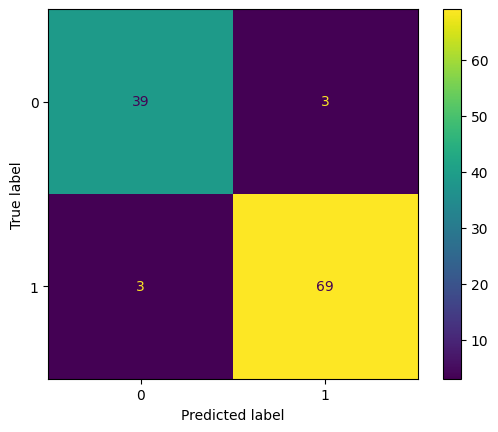

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(cm)
disp.plot()


In [ ]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,   # 🔥 THIS IS THE FIX
    random_state=42
)

svm.fit(X_train_scaled, y_train)


SVC(C=10, probability=True, random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


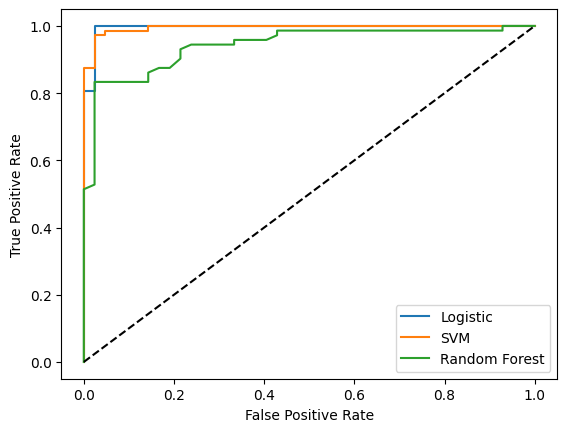

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic": log_reg,
    "SVM": svm,
    "Random Forest": best_rf
}

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = best_rf.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

imp_df.head(10)


,Feature,Importance
22,worst perimeter,0.133100
23,worst area,0.128052
27,worst concave points,0.108107
7,mean concave points,0.094414
20,worst radius,0.090639
0,mean radius,0.058662
2,mean perimeter,0.055242
3,mean area,0.049938
6,mean concavity,0.046207
26,worst concavity,0.035357


In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df.head()


,Feature,Coefficient
5,mean compactness,0.765042
15,compactness error,0.653063
19,fractal dimension error,0.467616
18,symmetry error,0.411409
11,texture error,0.278271


In [ ]:
final_model = svm


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = final_model.predict(X_test_scaled)
y_prob = final_model.predict_proba(X_test_scaled)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[41  1]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9950396825396826


In [ ]:
cm = confusion_matrix(y_test, y_pred)
FN = cm[1][0]
FP = cm[0][1]

print("False Negatives:", FN)
print("False Positives:", FP)


False Negatives: 2
False Positives: 1


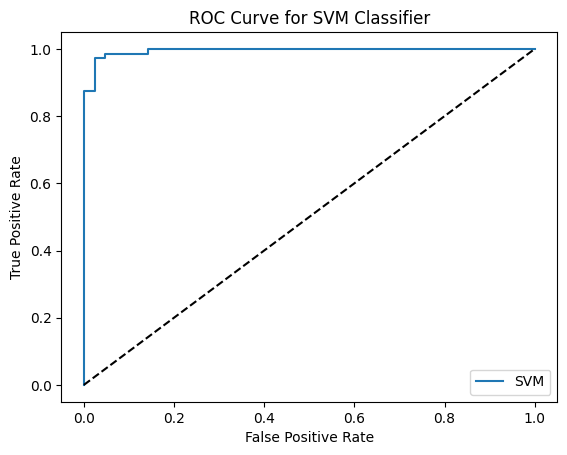

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="SVM")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Classifier")
plt.legend()
plt.show()


In [ ]:
sample = X.iloc[5].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)

pred = final_model.predict(sample_scaled)

print("Malignant" if pred[0]==1 else "Benign")


Benign


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_model,
    X_train_scaled,
    y_train,
    cv=10,
    scoring='recall'
)

print("Mean Recall:", cv_scores.mean())
print("Std:", cv_scores.std())


Mean Recall: 0.975615763546798
Std: 0.022200304116736447


In [ ]:
# Feature-wise min and max from dataset
feature_ranges = {}

for feature in X.columns:
    feature_ranges[feature] = (
        X[feature].min(),
        X[feature].max()
    )

print("Feature ranges initialized successfully ✅")


Feature ranges initialized successfully ✅


In [ ]:
def predict_breast_cancer(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    prediction = svm.predict(input_scaled)[0]
    probability = svm.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        return f"🔴 Malignant (Cancer Detected)\nConfidence: {probability:.3f}"
    else:
        return f"🟢 Benign (No Cancer)\nConfidence: {1 - probability:.3f}"


In [ ]:
#*print("\n🔹 Enter 30 feature values (range-validated):\n")

#user_input = []

#for feature in X.columns:
 #   min_val, max_val = feature_ranges[feature]

  #  while True:
   #     try:
    #        value = float(input(f"{feature} [{min_val:.2f} – {max_val:.2f}]: "))

     #       if min_val <= value <= max_val:
      #          user_input.append(value)
       #         break
        #    else:
         #       print(f"❌ Enter value between {min_val:.2f} and {max_val:.2f}")

        #except ValueError:
         #   print("❌ Numeric value required.")

#print("\n🔍 Prediction Result:")
#print(predict_breast_cancer(user_input))



In [ ]:
from sklearn.ensemble import VotingClassifier

hybrid_voting = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('rf', best_rf)
    ],
    voting='soft'
)

hybrid_voting.fit(X_train_scaled, y_train)

y_pred_hybrid = hybrid_voting.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Hybrid Accuracy:", accuracy_score(y_test, y_pred_hybrid))
print(confusion_matrix(y_test, y_pred_hybrid))
print(classification_report(y_test, y_pred_hybrid))


Hybrid Accuracy: 0.9824561403508771
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
hybrid_weighted = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('rf', best_rf),
        ('lr', log_reg)
    ],
    voting='soft',
    weights=[3, 2, 1]  # SVM ko zyada importance
)

hybrid_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = hybrid_weighted.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_weighted))


[[41  1]
 [ 1 71]]


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('svm', svm),
        ('rf', best_rf)
    ],
    final_estimator=LogisticRegression()
)

stacking.fit(X_train_scaled, y_train)

y_pred_stack = stacking.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_stack))


[[41  1]
 [ 1 71]]
